# Stanford CME 241 (Winter 2025) - Assignment 2

**Due: Tuesday, February 4 @ 11:59 PM PST on Gradescope.**

Assignment instructions:
- Make sure each of the subquestions have answers
- Ensure that group members indicate which problems they're in charge of
- Show work and walk through your thought process where applicable
- Empty code blocks are for your use, so feel free to create more under each section as needed
- Document code with light comments (i.e. 'this function handles visualization')

Submission instructions:
- When complete, fill out your publicly available GitHub repo file URL and group members below, then export or print this .ipynb file to PDF and upload the PDF to Gradescope.

*Link to this ipynb file in your public GitHub repo (replace below URL with yours):* 

https://github.com/JunyoungJeong-acct/RL-book/assignment2/assignment2.ipynb

*Group members (replace below names with people in your group):* 
- Junyoung Jeong
- Elliot Porter
- Andrew Sung

## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Question 1: Job-Hopping and Wages-Utility-Maximization (Led by ______)

You are a worker who starts every day either employed or unemployed. If you start your day employed, you work on your job for the day (one of $n$ jobs, as elaborated later) and you get to earn the wage of the job for the day. However, at the end of the day, you could lose your job with probability $\alpha \in [0,1]$, in which case you start the next day unemployed. If at the end of the day, you do not lose your job (with probability $1-\alpha$), then you will start the next day with the same job (and hence, the same daily wage). 

On the other hand, if you start your day unemployed, then you will be randomly offered one of $n$ jobs with daily wages $w_1, w_2, \ldots w_n \in \mathbb{R}^+$ with respective job-offer probabilities $p_1, p_2, \ldots p_n \in [0,1]$ (with $\sum_{i=1}^n p_i = 1$). You can choose to either accept or decline the offered job. If you accept the job offer, your day progresses exactly like the **employed-day** described above (earning the day's job wage and possibly (with probability $\alpha$) losing the job at the end of the day). However, if you decline the job offer, you spend the day unemployed, receive the unemployment wage $w_0 \in \mathbb{R}^+$ for the day, and start the next day unemployed.

The problem is to identify the optimal choice of accepting or rejecting any of the job offers the worker receives, in a manner that maximizes the infinite-horizon **Expected Discounted-Sum of Wages Utility**. Assume the daily discount factor for wages (employed or unemployed) is $\gamma \in [0,1])$. Assume Wages Utility function to be $U(w) = \log(w)$ for any wage amount $w \in \mathbb{R}^+$. The goal is to maximize:

$$
\mathbb{E}\left[\sum_{u=t}^\infty \gamma^{u-t} \cdot \log(w_{i_u})\right]
$$

at the start of a given day $t$ ($w_{i_u}$ is the wage earned on day $u$, $0 \leq i_u \leq n$ for all $u \geq t$).

---

### Subquestions

#### Part (A): MDP Modeling

Express the job-hopping problem as an MDP using clear mathematical notation by defining the following components:

1. **State Space**: Define the possible states of the MDP.
2. **Action Space**: Specify the actions available to the worker at each state.
3. **Transition Function**: Describe the probabilities of transitioning between states for each action.
4. **Reward Function**: Specify the reward associated with the states and transitions.
5. **Bellman Optimality Equation**: Write the Bellman Optimality Equation customized for this MDP.

---

#### Part (B): Python Implementation

Write Python code that:

1. Solves the Bellman Optimality Equation (hence, solves for the **Optimal Value Function** and the **Optimal Policy**) with a numerical iterative algorithm. 
2. Clearly define the inputs and outputs of your algorithm with their types (`int`, `float`, `List`, `Mapping`, etc.).

*Note*: For this problem, write the algorithm from scratch without using any prebuilt MDP/DP libraries or code.

---

#### Part (C): Visualization and Analysis

1. Plot the **Optimal Value Function** as a function of the state for a specific set of parameters ($n$, $w_1, \ldots, w_n$, $p_1, \ldots, p_n$, $\alpha$, $\gamma$, $w_0$).
2. Include these graphs in your submission.

---

#### Part (D): Observations

1. What patterns do you observe in the **Optimal Policy** as you vary the parameters $n$, $\alpha$, and $\gamma$?
2. Provide a brief discussion of your findings.

---

### Part (A) Answer
1. The possible states of the MDP are:
- 0: unemployed
- 1: employed
you are either employed or not.


2. The Action space for a given state is:
- become employed; accept offe3r (0 --> 1)
- stay employed; do nothing N/A (1 --> 1)
- become unemployed; lose job (1 --> 0)
- stay unemployed; reject offer (0 --> 0)

If employed you have no actions. you either become employed or stay employed based off of transition probabilities.
If unemployed you can either accept or reject the job offer which is determined by the job's given acceptance probability p_i


3. the transistion space is:
-  $P(1|0, N/A) = \alpha\ $
- $P(1|1, N/A) = 1 - \alpha\ $
- $P(0|1, Accept) = p_i$
- $P(0|0, Reject) = 1 - p_i$

This means the probability of losing your job is alpha. Hence keeping your job is (1 - alpha)
The probability of accepting a job offer is p_i, where rejecting is (1 - p_i)

4. Reward Space is:
- $ R(0, accept, 1)\ = 0$
- $R(0, reject, 0) = w_0$
- $R(1, N/A, 0) = 0$
- $R(1, N/A, 1) = w_j$

This means that if you maintain your state you get a wage, w_0 if still unemployed and w_i if employed. 
If you change states you do not get paid. 

### 1. State-Value Function \( V^*(s) \)
The **optimal value function** represents the maximum expected reward achievable from state \( s \):

$$
V^*(s) = \max_{a} \sum_{s'} P(s' | s, a) \left[ R(s, a, s') + \gamma V^*(s') \right]
$$

So for **State 0**, being unemployed the optimallity function is
$$
V(0) = \max \left[ w_0 + \gamma V(0), \gamma V(1) \right]
$$

where:
- $(w_0)$: Unemployment wage
- $(\gamma)\$: Discount Factor


So for **State 1**, being employed the optimallity function is
$$
V(1) = \mathbb{E}[w_j] + \gamma \left[ (1 - \alpha)V(1) + \alpha V(0) \right]
$$

where:
-  $\mathbb{E}[w_j] = \sum_{j} p_j w_j$ is **Expected Wage** over all jobs
- $(w_0)$: Unemployment wage
- $(\gamma)\ $: Discount Factor
- $(\alpha) $: probability of losing job



### Part (B) Answer

In [3]:
# Initialize parameters
gamma = 0.9  # Discount factor
alpha = 0.1  # Probability of losing the job

# Initialize wages, wage probabilities, and expected wage
w_0 = 10  # Unemployment wage
w_j = [20, 30, 40]   
p_j = [0.3, 0.5, 0.2] 
expected_wage = sum(p * w for p, w in zip(p_j, w_j))

# Initialize Value Function and Policy
V = {0: 0, 1: 0}  # Initial values for unemployed and employed
policy = {0: None, 1: None}  # Optimal policy for each state


def optimize_policy(V, policy, w0, wj, pj, max_iterations=1000):    
    expected_wage = sum(p * w for p, w in zip(p_j, w_j))
    epsilon = 1e-6  # Convergence threshold
    delta = float("inf")
    iteration = 0

    while delta > epsilon and iteration < max_iterations:
        # Reinitialize state values
        new_V = V.copy()
        new_V[1] = expected_wage + gamma * ((1 - alpha) * V[1] + alpha * V[0])
        
        # Reject job offer
        reject_V = w0 + gamma * V[0]
        accept_V = gamma * V[1]
        new_V[0] = max(accept_V, reject_V)
        
        # Initialize policy
        policy[0] = "Reject" if reject_V > accept_V else "Accept"
        policy[1] = "Stay Employed"
        
        # Compute convergence
        delta = max(abs(new_V[0] - V[0]), abs(new_V[1] - V[1]))
        V = new_V
        iteration += 1

        
    return V, policy

V, policy = optimize_policy(V, policy, w_0, w_j, p_j)
# Output results
print(f"Optimal policy: {policy}")

print(f"Optimal value function: {V}")

Optimal policy: {0: 'Accept', 1: 'Stay Employed'}
Optimal value function: {0: 239.4495330599001, 1: 266.05503764705605}


### Part (C) Answer 

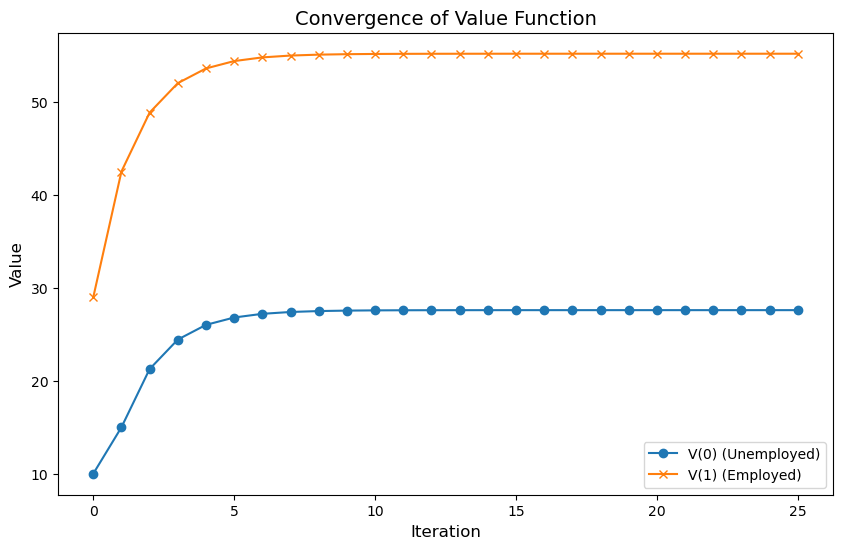

In [4]:
### Part (C) Answer

# Initialize parameters
gamma = 0.5  # Discount factor
alpha = 0.1  # Probability of losing the job

# Initialize wages, wage probabilities, and expected wage
w_0 = 10  # Unemployment wage
w_j = [20, 30, 40]   
p_j = [0.3, 0.5, 0.2] 
expected_wage = sum(p * w for p, w in zip(p_j, w_j))

# Initialize Value Function and Policy
V = {0: 0, 1: 0}  # Initial values for unemployed and employed
policy = {0: None, 1: None}  # Optimal policy for each state
def optimize_policy_with_history(V, policy, w0, wj, pj, max_iterations=10000):    
    expected_wage = sum(p * w for p, w in zip(p_j, w_j))
    epsilon = 1e-6  # Convergence threshold
    delta = float("inf")
    iteration = 0
    value_history = {"V(0)": [], "V(1)": []}

    while delta > epsilon and iteration < max_iterations:
        # Reinitialize state values
        new_V = V.copy()
        new_V[1] = expected_wage + gamma * ((1 - alpha) * V[1] + alpha * V[0])
        
        # Reject job offer
        reject_V = w0 + gamma * V[0]
        accept_V = gamma * V[1]
        new_V[0] = max(accept_V, reject_V)
        
        # Initialize policy
        policy[0] = "Reject" if reject_V > accept_V else "Accept"
        policy[1] = "Stay Employed"
        
        # Compute convergence
        delta = max(abs(new_V[0] - V[0]), abs(new_V[1] - V[1]))
        V = new_V
        
        # Log the current values of V(0) and V(1)
        value_history["V(0)"].append(V[0])
        value_history["V(1)"].append(V[1])

        iteration += 1
    return V, policy, value_history


V, policy, history = optimize_policy_with_history(V, policy, w_0, w_j, p_j)
v0_vals = np.array(history["V(0)"])
v1_vals = np.array(history["V(1)"])
x_vals =np.array(range(len(history["V(0)"])))

# Create the plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(x_vals, v0_vals, label="V(0) (Unemployed)", marker="o")  # Plot V(0) with markers
plt.plot(x_vals, v1_vals, label="V(1) (Employed)", marker="x")    # Plot V(1) with markers

# Add labels, title, and legend
plt.xlabel("Iteration", fontsize=12)  # Label for the x-axis
plt.ylabel("Value", fontsize=12)      # Label for the y-axis
plt.title("Convergence of Value Function", fontsize=14)  # Title of the plot
plt.legend(fontsize=10)  # Show legend

# Add grid for better readability
plt.grid(False)

# Show the plot
plt.show()

    

### Part (D) Answer
1. Change in gamma
- as you decrease gamma, the curves really flatten out over iterations

2. Changing iterations (n)
- as you change n, the number of iterations, the values appear to converge at the logistic decay healing value. Wher 67% of original value is lost

3. Changing alpha
- varies the settling point for uneployed value and employed value. This makes sense, because the optimal value will be higher/smaller accordingly.

## Question 2: Two-Stores Inventory Control (Led by ______)

We extend the capacity-constrained inventory example implemented in [rl/chapter3/simple_inventory_mdp_cap.py](https://github.com/TikhonJelvis/RL-book/blob/master/rl/chapter3/simple_inventory_mdp_cap.py) as a `FiniteMarkovDecisionProcess` (the Finite MDP model for the capacity-constrained inventory example is described in detail in Chapters 1 and 2 of the RLForFinanceBook). Here we assume that we have two different stores, each with their own separate capacities $C_1$ and $C_2$, their own separate Poisson probability distributions of demand (with means $\lambda_1$ and $\lambda_2$), their own separate holding costs $h_1$ and $h_2$, and their own separate stockout costs $p_1$ and $p_2$. At 6pm upon stores closing each evening, each store can choose to order inventory from a common supplier (as usual, ordered inventory will arrive at the store 36 hours later). We are also allowed to transfer inventory from one store to another, and any such transfer happens overnight, i.e., will arrive by 6am next morning (since the stores are fairly close to each other). Note that the orders are constrained such that following the orders on each evening, each store's inventory position (sum of on-hand inventory and on-order inventory) cannot exceed the store's capacity (this means the action space is constrained to be finite). Each order made to the supplier incurs a fixed transportation cost of $K_1$ (fixed-cost means the cost is the same no matter how many units of non-zero inventory a particular store orders). Moving any non-zero inventory between the two stores incurs a fixed transportation cost of $K_2$. 

Model this as a derived class of `FiniteMarkovDecisionProcess` much like we did for `SimpleInventoryMDPCap` in the code repo. Set up instances of this derived class for different choices of the problem parameters (capacities, costs etc.), and determine the Optimal Value Function and Optimal Policy by invoking the function `value_iteration` (or `policy_iteration`) from file [rl/dynamic_programming.py](https://github.com/TikhonJelvis/RL-book/blob/master/rl/dynamic_programming.py).

Analyze the obtained Optimal Policy and verify that it makes intuitive sense as a function of the problem parameters.

In [5]:
import itertools
from rl.markov_decision_process import FiniteMarkovDecisionProcess
from rl.markov_process import NonTerminal
from rl.distribution import Categorical

class TwoStores_MDP(FiniteMarkovDecisionProcess): 
    
    #self initialize
    def __init__(self, C1, C2, h1, h2, p1, p2, K1, K2, KT, lambda1, lambda2):
        self.c1 = C1  # Capacity of store 1
        self.c2 = C2  # Capacity of store 2
        self.h1 = h1  # Holding cost for store 1
        self.h2 = h2  # Holding cost for store 2
        self.p1 = p1  # Stockout cost for store 1
        self.p2 = p2  # Stockout cost for store 2
        self.K1 = K1  # Fixed ordering cost for store 1
        self.K2 = K2  # Fixed ordering cost for store 2
        self.KT = KT  # Fixed transfer cost between stores
        self.lambda1 = lambda1  # Poisson rate for store 1
        self.lambda2 = lambda2  # Poisson  rate for store 2
        
        # Create state space
        self.states = [
            (i, j) for i in range(C1 + 1) for j in range(C2 + 1)
        ]
    
    def actions(self, state):
        I1, I2 = state
        actions = []
        for i in range(self.C1 - I1 + 1):
            for j in range(self.C2 - I2 + 1):
                for ii in range(min(I1, self.C2 - I2) + 1):
                    for jj in range(min(I2, self.C1 - I1) + 1):
                        actions.append((i, j, ii, jj))
        return actions
        
    
    def step(self, state, action):
        I1, I2 = state
        i, j, k, l = action
        next_states = {}
        
        for D1 in range(I1 + O1 + 1):
            for D2 in range(I2 + j + 1):
                P_D1 = poisson.pmf(D1, self.lambda1)
                P_D2 = poisson.pmf(D2, self.lambda2)
                
                next_I1 = max(0, min(self.C1, I1 + i - D1 + l - k))
                next_I2 = max(0, min(self.C2, I2 + j - D2 + k - l))
                reward = -(
                    self.h1 * next_I1 + self.h2 * next_I2 +
                    self.p1 * max(0, D1 - (I1 + i)) +
                    self.p2 * max(0, D2 - (I2 + j)) +
                    self.K1 * (O1 > 0) + self.K2 * (j > 0) +
                    self.KT * (k > 0 or l > 0)
                )
                
                next_states[(next_I1, next_I2)] = (P_D1 * P_D2, reward)
        
        return Categorical(next_states)


In [6]:
from rl.dynamic_programming import value_iteration

mdp = TwoStores_MDP(
    C1=10, C2=10, h1=1, h2=1, p1=10, p2=10,
    K1=5, K2=5, KT=2, lambda1=5, lambda2=5
)

optimal_value_function, optimal_policy = value_iteration(mdp, gamma=0.9)

print("Optimal Value Function:")
for state, value in optimal_value_function.items():
    print(f"State {state}: {value:.2f}")

print("\nOptimal Policy:")
for state, action in optimal_policy.items():
    print(f"State {state}: {action}")
    
# Convert value function to a grid
value_grid = np.zeros((mdp.C1 + 1, mdp.C2 + 1))
for (i1, i2), value in optimal_value_function.items():
    value_grid[i1, i2] = value

plt.imshow(value_grid, origin="lower", cmap="viridis")
plt.colorbar(label="Optimal Value")
plt.xlabel("Inventory at Store 1")
plt.ylabel("Inventory at Store 2")
plt.title("Optimal Value Function Heatmap")
plt.show()

AttributeError: 'TwoStores_MDP' object has no attribute 'non_terminal_states'

## Question 3: Dynamic Price Optimization (Led by Junyoung Jeong)

You own a supermarket, and you are $T$ days away from Halloween 🎃. You have just received $M$ Halloween masks from your supplier. You want to dynamically set the selling price of the Halloween masks at the start of each day in a manner that maximizes your **Expected Total Sales Revenue** for Halloween masks this season (assume no one will buy Halloween masks after Halloween).

Assume that for each of the $T$ days, you are required to select a price for that day from one of $N$ prices $p_1, p_2, \dots, p_N \in \mathbb{R}$, and that price is the selling price for all masks on that day. Assume that the customer demand for the number of Halloween masks on any day is governed by a Poisson probability distribution with mean $\lambda_i \in \mathbb{R}$ if you select that day’s price to be $p_i$ (where $i$ is a choice among $1, 2, \dots, N$).

Note that on any given day, the demand could exceed the number of Halloween masks you have in the store, in which case the number of masks sold on that day will be equal to the number of Halloween masks you had at the start of that day.

We spoke about this example in class - referencing the slides here (if needed) could be helpful!

---

### Subquestions

#### Part (A): Bellman Optimality Equation

Write the **Bellman Optimality Equation** customized to this Markov Decision Process (MDP). Essentially, you need to express the **Optimal Value Function** $v_*$ recursively based on taking the best action in the current state and based on the subsequent random customer demand that would produce the appropriate reward and take you to the next state.

**Note**: The probability mass function of a Poisson distribution with mean $\lambda \in \mathbb{R}$ is given by:

$$
f(k) = \frac{e^{-\lambda} \lambda^k}{k!}, \quad k = 0, 1, 2, \dots
$$

---

#### Part (B): Boundary Conditions

To be able to solve the $v_*$ recursion, you need to know the values of $v_*$ for the boundary case (boundary states). Write down the boundary case(s) for the $v_*$ recursion.

---

#### Part (C): Numerical Solution

You can solve this $v_*$ recursion (hence, solve for the **Optimal Policy** $\pi_*$) with a numerical recursive algorithm (essentially a special form of Dynamic Programming algorithm customized to this problem). 

Write Python code for this algorithm that would enable you to dynamically set the selling price at the start of each day. Clearly define the inputs and outputs of your algorithm with their types (`int`, `float`, `List`, `Mapping`, etc.).

---


### Part (A) Answer
Let us denote $m$ as the number of masks that are still in stock, and $k$ as daily customer demand. We will also denote time $T$ as the day after Halloween, so no more masks will be sold on day $T$. The Bellman Optimality condition for our problem is as follows.
\begin{align}
    V^*(m,t) = \max\limits_{i} \sum\limits_{k = 0}^\infty \bigg[p_i(m,t) k  + \beta V^*(m-k,t+1) \bigg] \frac{e^{-\lambda} \lambda_i^k}{k!}
\end{align}

### Part (B) Answer
Clearly, $V(m,T) = 0$ for all $m$ as no one will buy masks after Halloween. On day $T-1$, you solve the following one-shot problem.
\begin{align}
    V^*(m,T-1)  &= \max\limits_{i} \sum\limits_{k = 0}^\infty p_i(m,T-1) k  \frac{e^{-\lambda} \lambda_i^k}{k!}\\
                &= \max\limits_{i} p_i(m,T-1) \lambda_i\\
\end{align} 
This is a finite optimization problem so $V^*$ will be well defined. 

### Part (C) Answer

In [1]:
# The code for this solution is almost exactly copied from "clearance_pricing_mdp.py"
# I comment descriptions to show proof that I am not just blindly copying the code and understand what is going on
# I also comment at key points where I am answering the question


from rl.markov_decision_process import (
    FiniteMarkovDecisionProcess, FiniteMarkovRewardProcess)
from rl.policy import FiniteDeterministicPolicy, FinitePolicy
from rl.finite_horizon import WithTime
from typing import Sequence, Tuple, Iterator
from scipy.stats import poisson
from rl.distribution import Categorical
from rl.finite_horizon import (
    finite_horizon_MRP, unwrap_finite_horizon_MRP, evaluate,
    finite_horizon_MDP, unwrap_finite_horizon_MDP, optimal_vf_and_policy)
from rl.dynamic_programming import V


class ClearancePricingMDP: # A class defining this specific Finite Markov Decision Process (FMDP)

    initial_inventory: int
    time_steps: int
    price_lambda_pairs: Sequence[Tuple[float, float]]
    single_step_mdp: FiniteMarkovDecisionProcess[int, int]
    mdp: FiniteMarkovDecisionProcess[WithTime[int], int]

    def __init__(
        self,
        ########################################## This section represents the inputs to the MDP ##################################
        initial_inventory: int,                                 # The initial inventory M which is an integer
        time_steps: int,                                        # The amount of time steps remaining T which is an integer
        price_lambda_pairs: Sequence[Tuple[float, float]]       # A sequence of pairs of floats representing (price, mean of poisson)
    ):
        self.initial_inventory = initial_inventory
        self.time_steps = time_steps
        self.price_lambda_pairs = price_lambda_pairs
        distrs = [poisson(l) for _, l in price_lambda_pairs]
        prices = [p for p, _ in price_lambda_pairs]

        # Define the a single step MDP - finite time problems can be solved using backward induction
        # This breaks the problem into a series of single step MDP 
        self.single_step_mdp: FiniteMarkovDecisionProcess[int, int] =\
            FiniteMarkovDecisionProcess({
                s: {i: Categorical(                                                 # For each price-lambda pair
                    {(s - k, prices[i] * k):                                        # the (state, reward) tuple realizes which is an (integer, float)
                     (distrs[i].pmf(k) if k < s else 1 - distrs[i].cdf(s - 1))      # with probability defined here which is a float
                     for k in range(s + 1)})
                    for i in range(len(prices))}
                for s in range(initial_inventory + 1)                               # This mapping is defined for the amount of inventory left
            })
        self.mdp = finite_horizon_MDP(self.single_step_mdp, time_steps)             # Define the total MDP using backwards induction

    ######################### These functions define the outputs of the algorithm #####################
    # A function to recover the value function for any fixed policy
    def get_vf_for_policy(
        self,
        policy: FinitePolicy[WithTime[int], int]                    # For any fixed policy (a mapping from state to a probability distribution over the action space)
    ) -> Iterator[V[int]]:                                          
        mrp: FiniteMarkovRewardProcess[WithTime[int]] \
            = self.mdp.apply_finite_policy(policy)
        return evaluate(unwrap_finite_horizon_MRP(mrp), 1.)         # Backwards induction to recover the value function (mapping from states (int,int) to actions and values (int, float)

    # Get the optimal value function
    def get_optimal_vf_and_policy(self)\
            -> Iterator[Tuple[V[int], FiniteDeterministicPolicy[int, int]]]:
        return optimal_vf_and_policy(unwrap_finite_horizon_MDP(self.mdp), 1.)       # This is also a mapping from states (int,int) to actions and values (int, float)


from pprint import pprint

####### Choose the inputs for the instance of this FMDP
ii = 8                                                          # Integer for initial inventory M
steps = 3                                                       # Integer for number of time steps left
pairs = [(1.0, 0.5), (0.7, 1.0), (0.5, 1.5), (0.3, 2.5)]        # List of (float,float) tuples defining the mapping between prices and expected demand

# Initialize the FMDP
cp: ClearancePricingMDP = ClearancePricingMDP(
    initial_inventory=ii,
    time_steps=steps,
    price_lambda_pairs=pairs
)


# This prints the optimal value function and policy
print("Optimal Value Function and Optimal Policy")
print("------------------------------------")
prices = []
for t, (vf, policy) in enumerate(cp.get_optimal_vf_and_policy()):
    print(f"Time Step {t:d}")                                           # For each time step
    print("---------------")
    pprint(vf)                                                          # Print the value function at this state (inv,time) which is a float
    print(policy)                                                       # and the optimal policy (i.e. Action 1 is to pick the first price in the list)



Optimal Value Function and Optimal Policy
------------------------------------
Time Step 0
---------------
{NonTerminal(state=0): 0.0,
 NonTerminal(state=1): 0.7949014693829384,
 NonTerminal(state=2): 1.3036943427169725,
 NonTerminal(state=3): 1.642821185319824,
 NonTerminal(state=4): 1.8912648812265112,
 NonTerminal(state=5): 2.0361088127147537,
 NonTerminal(state=6): 2.118894460455138,
 NonTerminal(state=7): 2.185539582741706,
 NonTerminal(state=8): 2.2207449910650334}
For State 0: Do Action 0
For State 1: Do Action 0
For State 2: Do Action 0
For State 3: Do Action 1
For State 4: Do Action 1
For State 5: Do Action 1
For State 6: Do Action 2
For State 7: Do Action 2
For State 8: Do Action 2

Time Step 1
---------------
{NonTerminal(state=0): 0.0,
 NonTerminal(state=1): 0.6618496899823091,
 NonTerminal(state=2): 1.0210612069374845,
 NonTerminal(state=3): 1.2552730837697939,
 NonTerminal(state=4): 1.3703565375198656,
 NonTerminal(state=5): 1.4374841691175742,
 NonTerminal(state=6): 1.47

## Question 4: Risk-Aversion and Utility Optimization under CARA Utility (Led by Junyoung Jeong)

You are tasked with analyzing the behavior of an investor who seeks to maximize their utility under **CARA Utility**. The investor has wealth $W$ and the CARA utility function:

$$
U(W) = \frac{1 - e^{-aW}}{a}, \quad a > 0,
$$

where $a$ represents the investor's **risk aversion**.

The investor allocates their wealth between:
1. A **riskless asset** with a fixed return $r$, and
2. A **risky asset** with return $R \sim \mathcal{N}(\mu, \sigma^2)$

The investor allocates a fraction $\pi$ of their wealth to the risky asset and $(1 - \pi)$ to the riskless asset. The wealth $W$ after one year is given by:

$$
W = (1 + r)(1 - \pi) + (1 + R)\pi.
$$

The goal is to analyze the investor’s optimal allocation $\pi$ to the risky asset and compute key risk-related quantities.

---

### Subquestions

#### Part (A): Expected Utility and Certainty-Equivalent Wealth

1. Derive the expression for the **expected utility** $\mathbb{E}[U(W)]$, using the given CARA utility function and assuming $R \sim \mathcal{N}(\mu, \sigma^2)$.
2. Using a Taylor expansion, approximate the **certainty-equivalent wealth** $W_{CE}$ up to second-order terms.

---

#### Part (B): Optimal Portfolio Allocation

Derive the optimal fraction $\pi^*$ of wealth to be allocated to the risky asset such that the **expected utility** $\mathbb{E}[U(W)]$ is maximized. Express $\pi^*$ in terms of $a$, $\mu$, $r$, and $\sigma^2$.

---

#### Part (C): Risk Premium

1. Using the results from Part (A), calculate the **absolute risk premium** $\pi_A = \mathbb{E}[W] - W_{CE}$.
2. Verify that $\pi_A \approx \frac{a \pi^2 \sigma^2}{2}$ for small $\sigma^2$.

---

#### Part (D): Numerical Calculations and Interpretation

Given the parameters $r = 0.02$, $\mu = 0.08$, $\sigma^2 = 0.04$, and $a = 3$:
1. Compute the optimal allocation $\pi^*$.
2. Calculate the certainty-equivalent wealth $W_{CE}$.
3. Compute the absolute risk premium $\pi_A$.
4. Interpret the results and discuss how changes in $a$ and $\sigma^2$ affect the risk premium and portfolio allocation.

---

#### Part (E): Expected Utility under Uniform Distribution

Now assume that the return of the risky asset, $R$, is no longer normally distributed. Instead, $R \sim \text{Uniform}[\alpha, \beta]$, where $\alpha$ and $\beta$ are the lower and upper bounds of the distribution, respectively.

1. Derive the new expression for the **expected utility** $\mathbb{E}[U(W)]$. Make sure to simplify your result as much as possible, and ensure that it explicitly depends on $a$, $\pi$, $\alpha$, $\beta$, and $r$.

**Hint**: Use the fact that if $W \sim \text{Uniform}[w_{\text{min}}, w_{\text{max}}]$, then:

$$
\mathbb{E}[g(W)] = \frac{1}{w_{\text{max}} - w_{\text{min}}} \int_{w_{\text{min}}}^{w_{\text{max}}} g(W) \, dW.
$$

---

### Part (A) Answer

1. The expectated utility under CARA utility with risk aversion parameter $a$ and normally distributed returns $R \sim \mathcal{N}(\mu,\sigma^2)$ by using the moment generating function of the normal distribution.
\begin{align}
    \mathbb{E}[U(W)] 
    &= \mathbb{E}\left[\frac{1}{a} - \frac{1}{a}e^{-a [(1+r)(1-\pi) + (1+R)\pi]}\right]\\
    &= \frac{1}{a} - \frac{1}{a} e^{-a[(1+r)(1-\pi)+\pi]} \mathbb{E}\left[e^{- a R \pi} \right]\\
    &= \frac{1}{a} - \frac{1}{a} e^{-a [(1+r)(1-\pi) + \pi (\mu+1)] + \frac{1}{2} a^2 \pi^2 \sigma^2 }
\end{align}
The last equality follows from the moment generating function of the normal.

2. Take the second-order Taylor expansion of $\mathbb{E}[U(W)]$ around the point $C$.
\begin{align}
    \mathbb{E}[U(W)]
    &\approx \mathbb{E}\left[\frac{1-e^{-a C}}{a} + e^{-a C} (W - C) - \frac{a}{2} e^{-a C} (W-C)^2\right]\\
    &= \frac{1}{a} + e^{-a C}\mathbb{E}\left[-\frac{1}{a} + (W - C) - \frac{a}{2} (W-C)^2\right]\\
\end{align}
It may be especially appropriate to take the approximation centered around $C = \mathbb{E}[W]$.  
\begin{align}
    \mathbb{E}[U(W)]
    &\approx \frac{1}{a} + e^{-a \mathbb{E}[W]}\mathbb{E}\left[-\frac{1}{a} + (W - \mathbb{E}[W]) - \frac{a}{2} (W-\mathbb{E}[W])^2\right]\\
    &= \frac{1}{a} + e^{-a \mathbb{E}[W]}\left(-\frac{1}{a} + (\mathbb{E}[W] - \mathbb{E}[W]) - \frac{a}{2} \mathbb{E}[(W-\mathbb{E}[W])^2]\right)\\
    &= \frac{1}{a} - e^{-a \mathbb{E}[W]}\left(\frac{1}{a} + \frac{a}{2} \mathbb{V}[W]\right)
\end{align}
To find the certainty-equivalent wealth $W_{CE}$, we solve the following for $W_{CE}$.
\begin{align}
    U(W_{CE})
    &= \mathbb{E}[U(W)]\\
    \frac{1 - e^{-aW_{CE}}}{a}
    &= \frac{1}{a} - e^{-a \mathbb{E}[W]}\left(\frac{1}{a} + \frac{a}{2} \mathbb{V}[W]\right)\\
    \implies 
    W_{CE}
    &= \mathbb{E}[W] - \frac{1}{a} \ln\left(1 + \frac{a^2}{2} \mathbb{V}[W]\right)
\end{align}
where $\mathbb{E}[W] = (1+r)(1-\pi) + \pi (\mu+1)$ and $\mathbb{V}[W] = \pi^2 \sigma^2$. 

### Part (B) Answer

In Part (A), we derived the expected utility of the investor. Since monotonic transformations preserve extrema, it is sufficient to solve the following problem.
\begin{align}
    \max\limits_{\pi} \quad a [(1+r)(1-\pi) + \pi (\mu+1)] - \frac{1}{2} a^2 \pi^2 \sigma^2
\end{align}
Since the problem is concave and differentiable, first order conditions are necessary and sufficient to characterize the maximum. 
\begin{align}
    \pi^* = \frac{\mu - r}{a \sigma^2}
\end{align}

### Part (C) Answer

From our results in Part (A), the absolute risk premium is:
\begin{align}
    \mathbb{E}[W] - W_{CE}
    &= \frac{1}{a} \ln\left(1 + \frac{a^2}{2} \mathbb{V}[W]\right)\\
    &= \frac{1}{a} \ln\left(1 + \frac{a^2}{2} \pi^2 \sigma^2 \right)
\end{align}

For $x$ sufficiently small, $\ln(1+x) \approx x$, so for $\sigma^2$ sufficiently small
\begin{align}
    \frac{1}{a} \ln\left(1 + \frac{a^2}{2} \pi^2 \sigma^2 \right)
    &\approx \frac{a \pi^2 \sigma^2}{2}
\end{align}

### Part (D) Answer

Extending our results from Part (B) our optimal allocation is with $r = 0.02, \mu = 0.08, \sigma^2 = 0.04$ and $a =3$ is
\begin{align}
    \pi^* = \frac{0.08 - 0.02}{3 * 0.04} = .5
\end{align}
We can now plug this into our results from Part (A) to compute the certainty-equivalent wealth $W_{CE}$.
\begin{align} 
    W_{CE}
    &= (1+r)(1-\pi^*) + \pi^* (\mu+1) - \frac{1}{a} \ln\left(1 + \frac{a^2}{2} (\pi^*)^2 \sigma^2 \right)\\
    &= (1+0.02)(1-0.5) + 0.5 (0.08+1) - \frac{1}{3} \ln\left(1 + \frac{3^2}{2} (0.5)^2 * 0.04 \right)\\
    &= 1.03533
\end{align}


### Part (E) Answer
Now assuming that $R \sim Uniform[\alpha,\beta]$
\begin{align}
    \mathbb{E}[U(W)] 
    &= \mathbb{E}\left[\frac{1}{a} - \frac{1}{a}e^{-a [(1+r)(1-\pi) + (1+R)\pi]}\right]\\
    &= \frac{1}{a} - \frac{1}{a} e^{-a[(1+r)(1-\pi)+\pi]} \mathbb{E}\left[e^{- a R \pi} \right]\\
    &= \frac{1}{a} - \frac{1}{a} e^{-a[(1+r)(1-\pi)+\pi]} \frac{e^{-a\alpha \pi} - e^{-a\beta \pi}}{ap}\\
    &= \frac{1}{a} - \frac{1}{a^2 \pi} e^{-a[1+r-r\pi]} \left(e^{-a\alpha \pi} - e^{-a\beta \pi}\right)
\end{align}

## Question 5: Feeding Animals in a Zoo using Approximate Dynamic Programming (Led by Andrew)

You are tasked with developing a feeding strategy for a zoo using **Approximate Dynamic Programming (ADP)**. The zoo has a finite amount of food available each day, and you must distribute this food among a group of animals to maximize their overall satisfaction over a fixed time horizon $T$. 

Each animal has:
1. A **hunger level** $h_i(t) \in \mathbb{R}$ at time $t$, which increases as time passes without food and decreases when food is provided.
2. A **satisfaction function** $u_i(f) = \log(1 + f)$, where $f$ is the amount of food given to the animal. Satisfaction increases logarithmically with food.

You start each day with a total amount of food $F$ that you can distribute to the animals. The objective is to maximize the **cumulative satisfaction** of all animals over $T$ days while considering that food is finite and hunger levels evolve dynamically.

---

### Problem Dynamics:
1. **State**:
   - The state at time $t$ is the vector of hunger levels of all animals: $\mathbf{h}(t) = [h_1(t), h_2(t), \dots, h_N(t)]$, where $N$ is the number of animals.

2. **Action**:
   - The action $\mathbf{f}(t) = [f_1(t), f_2(t), \dots, f_N(t)]$ represents the food allocated to each animal, subject to the constraint:
     $$
     \sum_{i=1}^N f_i(t) \leq F.
     $$

3. **State Transition**:
   - Hunger levels evolve according to the dynamics:
     $$
     h_i(t+1) = \max(0, h_i(t) + \gamma - \delta f_i(t)),
     $$
     where $\gamma$ is the natural rate at which an animal's hunger increases, and $\delta$ is the rate at which feeding reduces hunger.

4. **Reward**:
   - The reward at each time step is the total satisfaction of all animals:
     $$
     r(\mathbf{h}(t), \mathbf{f}(t)) = \sum_{i=1}^N \log(1 + f_i(t)).
     $$

5. **Value Function Approximation**:
   - Use a **linear function approximation** for the value function:
     $$
     V(\mathbf{h}(t); \mathbf{w}) = \mathbf{w}^\top \phi(\mathbf{h}(t)),
     $$
     where $\phi(\mathbf{h}(t))$ is a feature vector derived from the state, and $\mathbf{w}$ is a weight vector learned during training.

6. **Objective**:
   - Use **Approximate Dynamic Programming (ADP)** to iteratively update the weights $\mathbf{w}$ and maximize the total cumulative reward:
     $$
     \max \ \mathbb{E} \left[\sum_{t=0}^{T-1} r(\mathbf{h}(t), \mathbf{f}(t)) \right].
     $$

---

### Subquestions

#### Part (A): State Representation
Write down the state vector $\mathbf{h}(t)$ and describe how it evolves over time based on the dynamics provided above.

---

#### Part (B): Reward Function
Derive the formula for the reward function $r(\mathbf{h}(t), \mathbf{f}(t))$ explicitly for $N=3$ animals. Assume specific food allocations $\mathbf{f}(t) = [f_1, f_2, f_3]$.

---

#### Part (C): Linear Function Approximation
Explain how the value function $V(\mathbf{h}(t))$ is approximated using the feature vector $\phi(\mathbf{h}(t))$ and the weight vector $\mathbf{w}$. Discuss why feature normalization is essential in this problem. What would happen if we didn't normalize the features?

---

#### Part (D): Numerical Simulation
Using the provided starter code, fill in all `TODO` areas. This will allow you to train the ADP model and compute the following:
1. The convergence of weights $\mathbf{w}$ over episodes.
2. The hunger levels of each animal over the time horizon $T$.
3. The total utility (cumulative reward) achieved over time for all animals.

**Hint**: What does the weight update formula from the slides tell you? We know that $\mathbf{w}_{t+1}=\mathbf{w}_t-\alpha_t\cdot\nabla_w\mathit{L}\left(\mathbf{w}_t\right)$. How can we use this?

**Hint**: You should only need to fill in $3$ lines for the code below; the idea here is to conceptually understand approximate dynamic programming, so if you're coding a lot, you might be overcomplicating things!

---

#### Part (E): Visualization
Visualization code is provided to generate the following $3$ graphs:
1. **Convergence of Weights**: The values of the weights $\mathbf{w}$ over training episodes.
2. **Hunger Levels Over Time**: The hunger levels of each animal over the time horizon $T$.
3. **Total Utility Over Time**: The cumulative utility (reward) achieved for all animals over the time horizon.

Comment briefly on each of these graphs, and for the weights graph, discuss why the weights[0] line looks different from the rest (if weights[0] doesn't look different, you might have done something wrong!).

---

### Part (A) Answer

**State Vector.**
At each time $t$, the state is the vector of hunger levels of all $N$ animals:
$
  \mathbf{h}(t) 
  \;=\; 
  \bigl[\, h_1(t),\, h_2(t),\, \dots,\, h_N(t) \bigr].
$

**State Evolution.**
These hunger levels evolve according to:
$
  h_i(t+1)
  \;=\;
  \max\bigl(0,\;h_i(t)\;+\;\gamma \;-\;\delta\,f_i(t)\bigr),
$

where
  $ \gamma $ is the natural rate at which an animal's hunger increases when not fed,
  $ \delta $ is the rate at which feeding reduces hunger,
  $ f_i(t) $ is the amount of food allocated to animal $i$ at time $t$.

### Part (B) Answer

**Reward Function}**
For $N = 3$ animals, let the action at time $t$ be:
$
  \mathbf{f}(t) 
  \;=\;
  [\,f_1,\;f_2,\;f_3\,],
$
with the daily food constraint
$
  f_1 + f_2 + f_3 \;\le\; F.
$
The reward is the sum of logarithmic satisfactions:
$
  r\bigl(\mathbf{h}(t), \mathbf{f}(t)\bigr)
  \;=\;
  \sum_{i=1}^{3} \log\bigl(1 + f_i\bigr)
  \;=\;
  \log\bigl(1 + f_1\bigr)
  \;+\;
  \log\bigl(1 + f_2\bigr)
  \;+\;
  \log\bigl(1 + f_3\bigr).
$

### Part (C) Answer

**Linear Function Approximation**

*Value Function Approximation.*
We approximate the value function using a linear model:
$
  V\bigl(\mathbf{h}(t); \mathbf{w}\bigr)
  \;=\;
  \mathbf{w}^\top \phi\bigl(\mathbf{h}(t)\bigr),
$
where

  $\phi(\mathbf{h}(t))$ is a feature vector derived from the state (e.g., raw hunger levels, polynomial terms, etc.),
  $\mathbf{w}$ is a weight vector learned via approximate dynamic programming.

*Why Feature Normalization Is Essential.*
- Stable Learning: Large feature magnitudes can dominate gradient updates, making learning unstable.
- Faster Convergence: Similar-scale features help gradient-based methods converge more quickly.
- Numerical Stability: Keeps gradients from blowing up or causing overflow.

*Without Normalization.*
If features are not normalized, one can encounter:
- Erratic updates or divergence (especially if one feature is much larger in magnitude than others),
- Need for very small learning rates (slower training),
- Potential for overemphasizing large-valued features while ignoring more subtle ones.

### Part (D) Answer

In [5]:
import numpy as np

N = 3  # Number of animals
T = 10  # Time horizon
F = 10  # Total food available per time step
gamma = 1  # Hunger growth rate
delta = 0.5  # Feeding efficiency
alpha = 0.01  # Learning rate
regLambda = 0.01  # Regularization coefficient

# Feature function: Normalize hunger levels
def features(hunger_levels):
    norm_hunger = hunger_levels / (np.max(hunger_levels) + 1e-5)  # Normalize hunger levels
    return np.array([1] + list(norm_hunger))  # Add bias term

# Reward function
def reward(food_allocation):
    """Compute reward as the sum of logarithmic satisfaction."""
    return np.sum(np.log1p(food_allocation))

# State transition function
def next_hunger(hunger_levels, food_allocation):
    """Compute next hunger levels based on current state and action."""
    return np.maximum(0, hunger_levels + gamma - delta * food_allocation)

# Bellman update with regularization
def bellman_update(states, actions, next_states, rewards, weights):
    """Perform one step of Bellman update for function approximation."""
    for s, a, ns, r in zip(states, actions, next_states, rewards):
        phi_s = features(s)
        phi_ns = features(ns)
        td_error = r + np.dot(weights, phi_ns) - np.dot(weights, phi_s)
        # use the update rule from the slides (regularized update)
        # will follow this form: weights += _ * _ * _ - regLambda * weights
        weights += alpha * (td_error * phi_s - regLambda * weights)
    return weights

# ADP Training
def approximate_dynamic_programming(num_episodes=100):
    global weights
    weights = np.zeros(len(features(np.zeros(N))))  # Initialize weights
    episode_rewards = []  # Track cumulative rewards per episode
    weights_history = []  # Track weights over episodes

    for episode in range(num_episodes):
        hunger_levels = np.zeros(N)  # Initial state
        total_reward = 0

        for t in range(T):
            # Sample a random action: Food allocation
            food_allocation = np.random.uniform(0, F, size=N)
            food_allocation = food_allocation / np.sum(food_allocation) * F

            # Calculate reward and next state
            r = reward(food_allocation)
            next_hunger_levels = next_hunger(hunger_levels, food_allocation)

            # Bellman update
            weights = bellman_update(
                [hunger_levels],
                [food_allocation],
                [next_hunger_levels],
                [r],
                weights,
            )

            # Update current state and accumulate reward
            hunger_levels = next_hunger_levels
            total_reward += r

        # Track metrics
        episode_rewards.append(total_reward)
        weights_history.append(weights.copy())
        print(f"Episode {episode + 1}: Total Reward = {total_reward:.2f}")

    return episode_rewards, weights_history

# Simulate a single episode and track hunger levels and total utility
def simulate_policy_and_utility(weights):
    hunger_levels = np.zeros(N)  # Initial hunger levels
    hunger_history = []  # Track hunger levels over time
    total_utility = []  # Track total utility (cumulative rewards) over time
    cumulative_utility = 0  # Initialize cumulative utility

    for t in range(T):
        # Compute action (food allocation)
        food_allocation = np.random.uniform(0, F, size=N)
        food_allocation = food_allocation / np.sum(food_allocation) * F

        # Record hunger levels
        hunger_history.append(hunger_levels.copy())

        # Calculate reward (utility) for this timestep
        r = reward(food_allocation)
        cumulative_utility += r  # Add to cumulative utility
        total_utility.append(cumulative_utility)

        # Update hunger levels
        hunger_levels = next_hunger(hunger_levels, food_allocation)

    return np.array(hunger_history), np.array(total_utility)

# Run the training process
episode_rewards, weights_history = approximate_dynamic_programming()

Episode 1: Total Reward = 40.73
Episode 2: Total Reward = 38.92
Episode 3: Total Reward = 41.06
Episode 4: Total Reward = 40.72
Episode 5: Total Reward = 41.67
Episode 6: Total Reward = 40.31
Episode 7: Total Reward = 41.44
Episode 8: Total Reward = 40.86
Episode 9: Total Reward = 41.34
Episode 10: Total Reward = 38.86
Episode 11: Total Reward = 41.51
Episode 12: Total Reward = 39.87
Episode 13: Total Reward = 40.39
Episode 14: Total Reward = 42.00
Episode 15: Total Reward = 40.28
Episode 16: Total Reward = 41.31
Episode 17: Total Reward = 40.26
Episode 18: Total Reward = 40.12
Episode 19: Total Reward = 42.41
Episode 20: Total Reward = 39.30
Episode 21: Total Reward = 41.47
Episode 22: Total Reward = 40.83
Episode 23: Total Reward = 39.35
Episode 24: Total Reward = 40.58
Episode 25: Total Reward = 42.01
Episode 26: Total Reward = 40.51
Episode 27: Total Reward = 40.47
Episode 28: Total Reward = 42.69
Episode 29: Total Reward = 40.37
Episode 30: Total Reward = 41.12
Episode 31: Total R

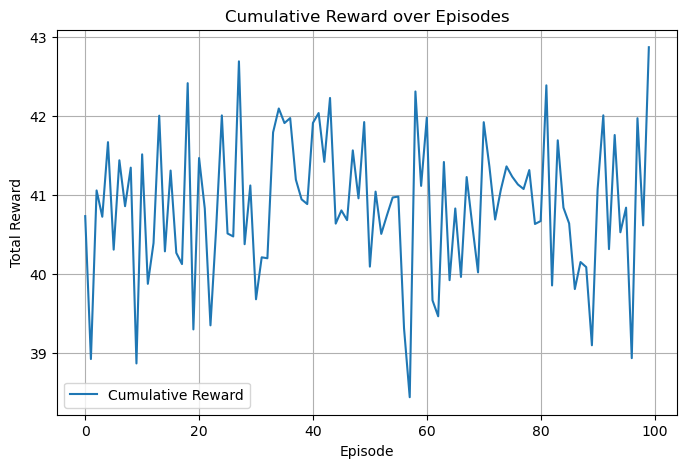

In [7]:
import matplotlib.pyplot as plt

# Plot cumulative reward over episodes
plt.figure(figsize=(8, 5))
plt.plot(episode_rewards, label="Cumulative Reward")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Cumulative Reward over Episodes")
plt.legend()
plt.grid()
plt.show()

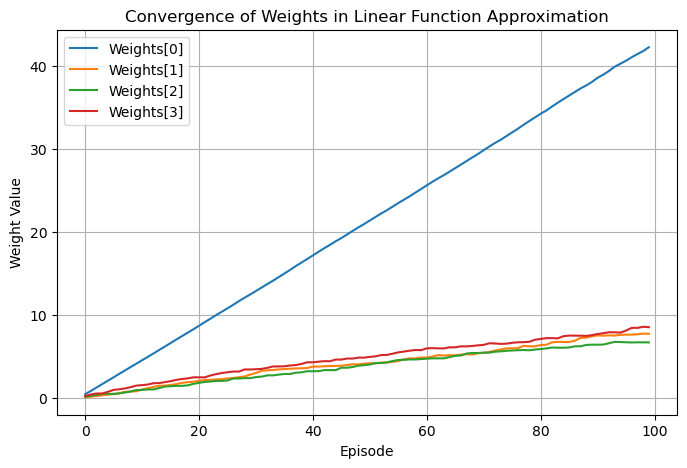

In [8]:
# Plot weights convergence
weights_history = np.array(weights_history)
plt.figure(figsize=(8, 5))
for i in range(weights_history.shape[1]):
    plt.plot(weights_history[:, i], label=f"Weights[{i}]")
plt.xlabel("Episode")
plt.ylabel("Weight Value")
plt.title("Convergence of Weights in Linear Function Approximation")
plt.legend()
plt.grid()
plt.show()

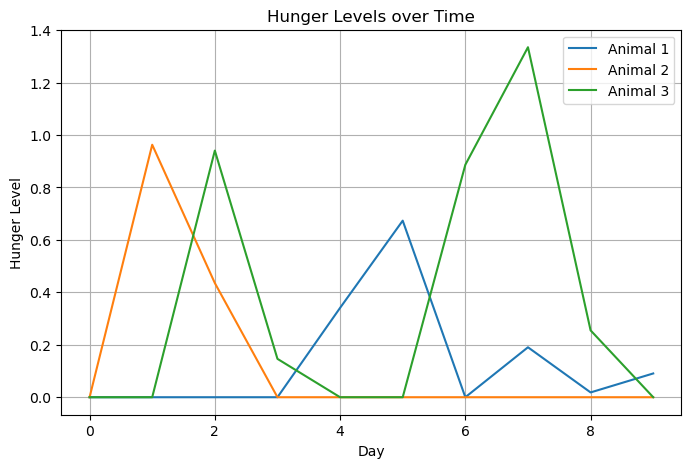

In [9]:
# Simulate policy and plot hunger levels and total utility over time
hunger_history, total_utility = simulate_policy_and_utility(weights)

# Plot hunger levels over time
plt.figure(figsize=(8, 5))
for i in range(hunger_history.shape[1]):
    plt.plot(hunger_history[:, i], label=f"Animal {i+1}")
plt.xlabel("Day")
plt.ylabel("Hunger Level")
plt.title("Hunger Levels over Time")
plt.legend()
plt.grid()
plt.show()

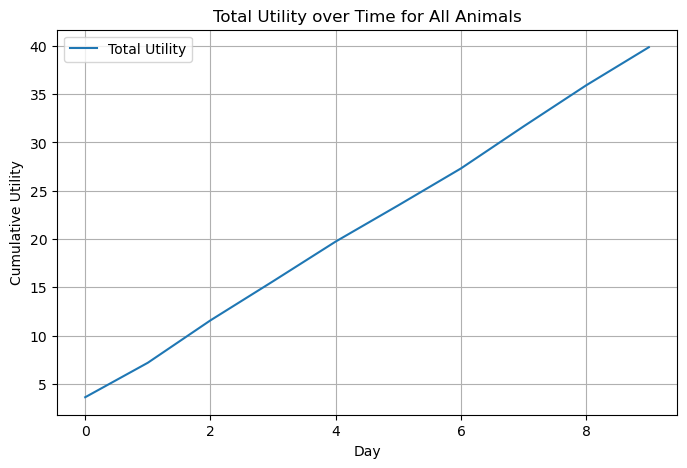

In [10]:
# Plot total utility over time
plt.figure(figsize=(8, 5))
plt.plot(range(T), total_utility, label="Total Utility")
plt.xlabel("Day")
plt.ylabel("Cumulative Utility")
plt.title("Total Utility over Time for All Animals")
plt.legend()
plt.grid()
plt.show()

### Part (E) Answer

**1. Convergence of Weights**

- Interpretation: The weight vector $\mathbf{w}$ typically contains one bias term (often $({weights}[0])$) plus one weight per feature. Over the course of training episodes, these weights are updated based on the approximate Bellman updates.
- Why $({weights}[0])$) May Differ: The first component of the weight vector usually acts as a bias term, which may grow on a different scale from the other feature-based weights. If its updates lead to large offsets (and it is not heavily regularized), it can drift more quickly compared to the rest, which are tied to normalized hunger features.

**2. Hunger Levels Over Time**

- Interpretation: Each animal’s hunger level follows the dynamics 
  $
    h_i(t+1) = \max\{0,\; h_i(t) + \gamma \;-\;\delta\,f_i(t)\}.
  $
  Over time, we see a pattern of growth (by $\gamma$) and feeding-induced drops (by $\delta f_i(t)$).
- Why They Fluctuate: Even with a decent feeding strategy, animals’ hunger levels may occasionally spike before food is provided. With random or exploratory allocations, the levels can vary significantly day-to-day.

**3. Total Utility Over Time**

- Interpretation: Total (cumulative) utility adds up all daily rewards of the form 
  $\sum_i \log\!\bigl(1 + f_i(t)\bigr)$. As each day’s reward is added, we typically see a non-decreasing curve.
- Steeper vs. Flatter Growth. If the policy efficiently allocates food among animals, we get higher $\log(1 + f_i)$ values each day, leading to steeper growth. In less optimal or random settings, daily increments may be smaller, so the curve grows more slowly.
